# csv_path만 수정하시고 모두 실행하시면 됩니다.
## 결측치가 있는 행을 제거 한 뒤 품종명별 데이터 비율이 출력됩니다.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
csv_path = 'data/배추_이상치제거_주간기준_등급코드.csv'
df = pd.read_csv(csv_path, encoding='cp949')
df.shape

(983690, 22)

In [15]:
exclude_cols = ['휴일여부', '명절지수', '작기정보']
df_clean = df.drop(columns=exclude_cols)
print('제거 전 shape:', df_clean.shape)
df_clean = df_clean.dropna()
print('제거 후 shape:', df_clean.shape)
df_clean.info()

제거 전 shape: (983690, 19)
제거 후 shape: (981380, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 981380 entries, 0 to 983688
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   주차            981380 non-null  object 
 1   연월일           981380 non-null  object 
 2   품목코드          981380 non-null  int64  
 3   품목명           981380 non-null  object 
 4   품종코드          981380 non-null  int64  
 5   품종명           981380 non-null  object 
 6   등급코드          981380 non-null  int64  
 7   등급이름          981380 non-null  object 
 8   총금액(원)        981380 non-null  float64
 9   총거래량(kg)      981380 non-null  float64
 10  평균단가(원)       981380 non-null  float64
 11  주간평균단가(원)     981380 non-null  float64
 12  직팜산지코드        981380 non-null  int64  
 13  일평균기온         981380 non-null  float64
 14  최고기온          981380 non-null  float64
 15  최저기온          981380 non-null  float64
 16  평균상대습도        981380 non-null  float64
 17

쌈배추: 39.5%
기타배추: 26.8%
월동배추: 9.1%
봄배추: 6.3%
김장(가을)배추: 6.0%
여름배추: 3.1%
고냉지배추: 2.8%
저장배추: 1.8%
절임배추: 1.5%
배추: 1.4%
우거지: 1.1%
배추뿌리: 0.4%
생채용 배추: 0.2%
배양채: 0.1%
배추(수입): 0.0%
우거지(수입): 0.0%


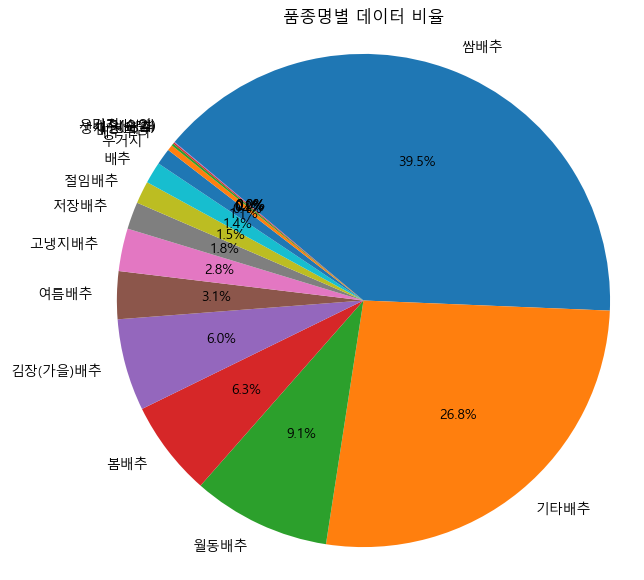

In [16]:
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

var_counts = df_clean['품종명'].value_counts(normalize=True) * 100
for 품종, 비율 in var_counts.items():
    print(f'{품종}: {비율:.1f}%')


var_counts = df_clean['품종명'].value_counts(normalize=True) * 100
plt.figure(figsize=(7,7))
plt.pie(var_counts, labels=var_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title('품종명별 데이터 비율')
plt.axis('equal')
plt.show()